# Anova

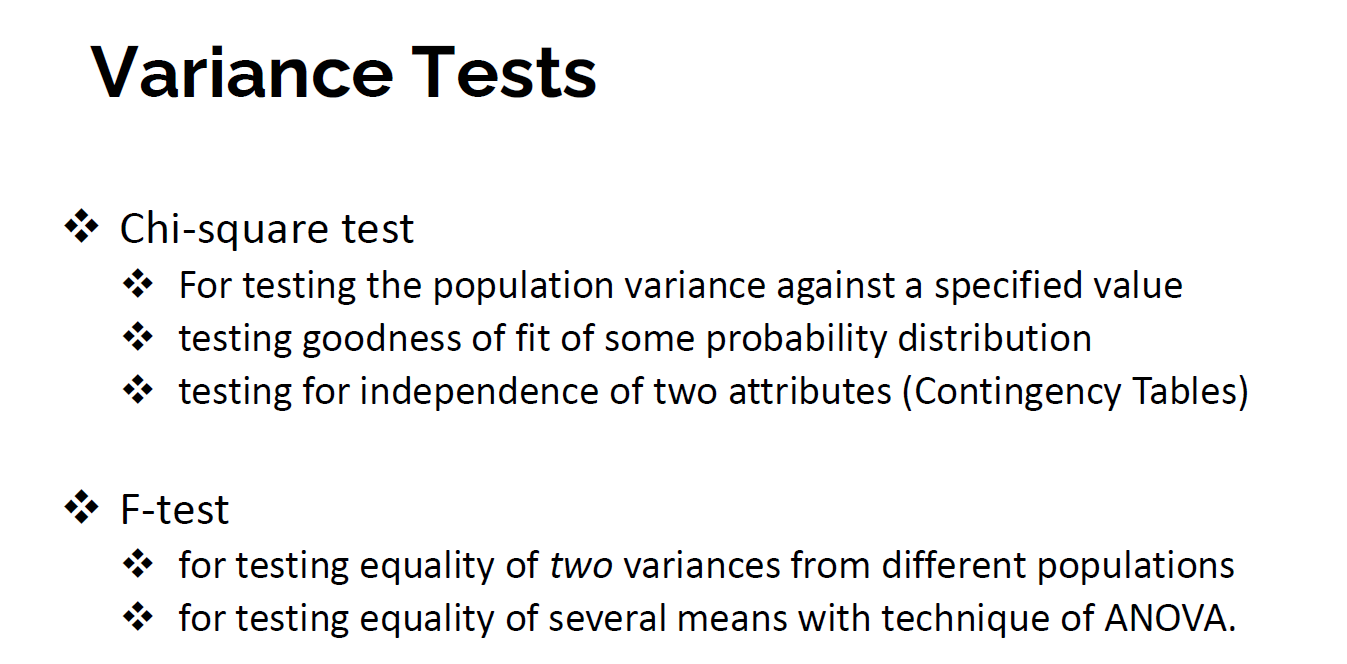

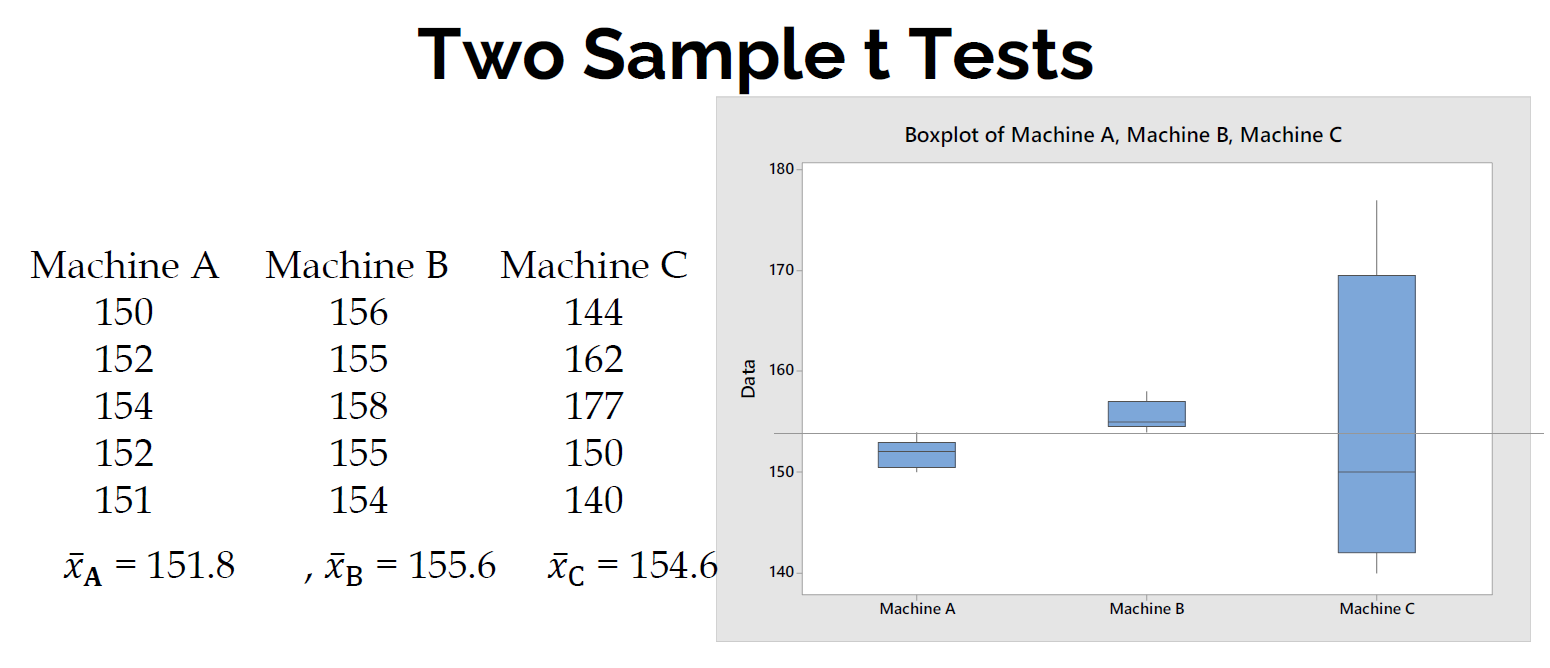

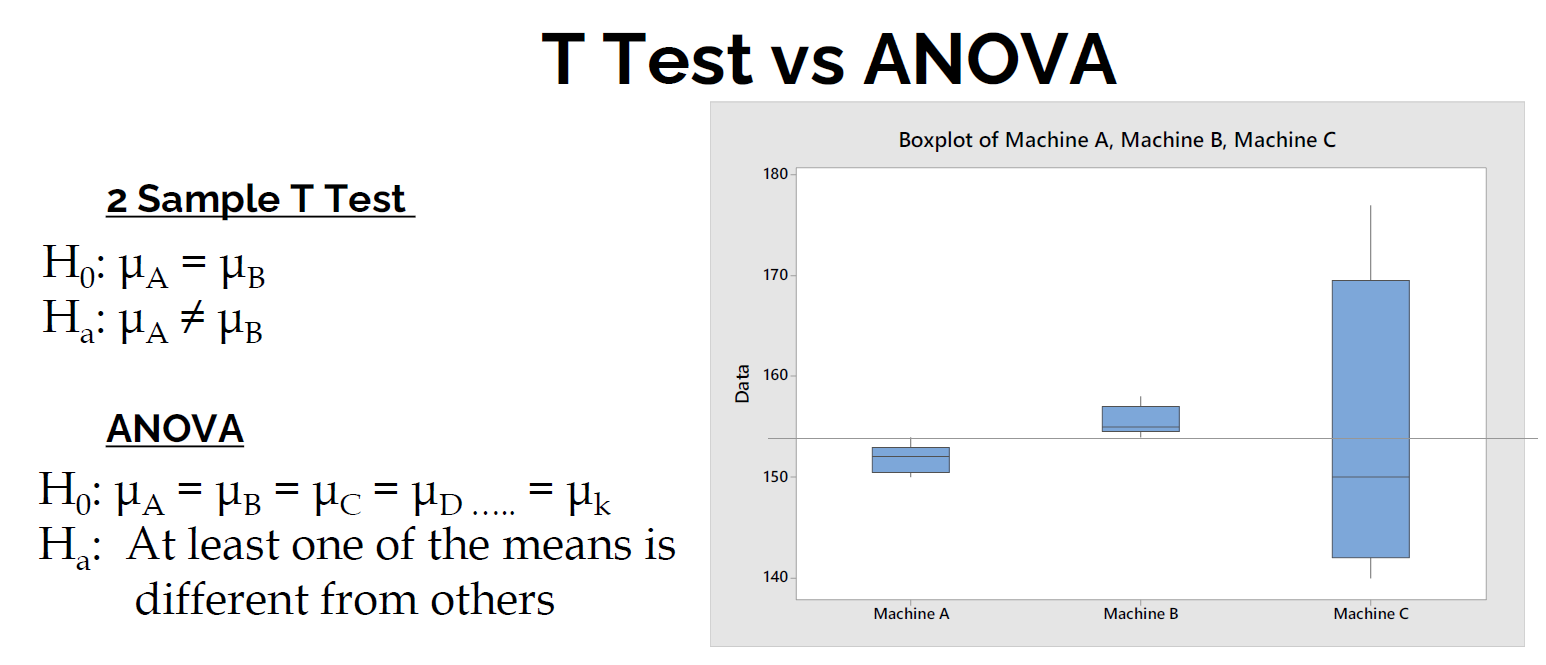

# ------------------------------------------------------------------------------------------------------------

### Importance of ANOVA:

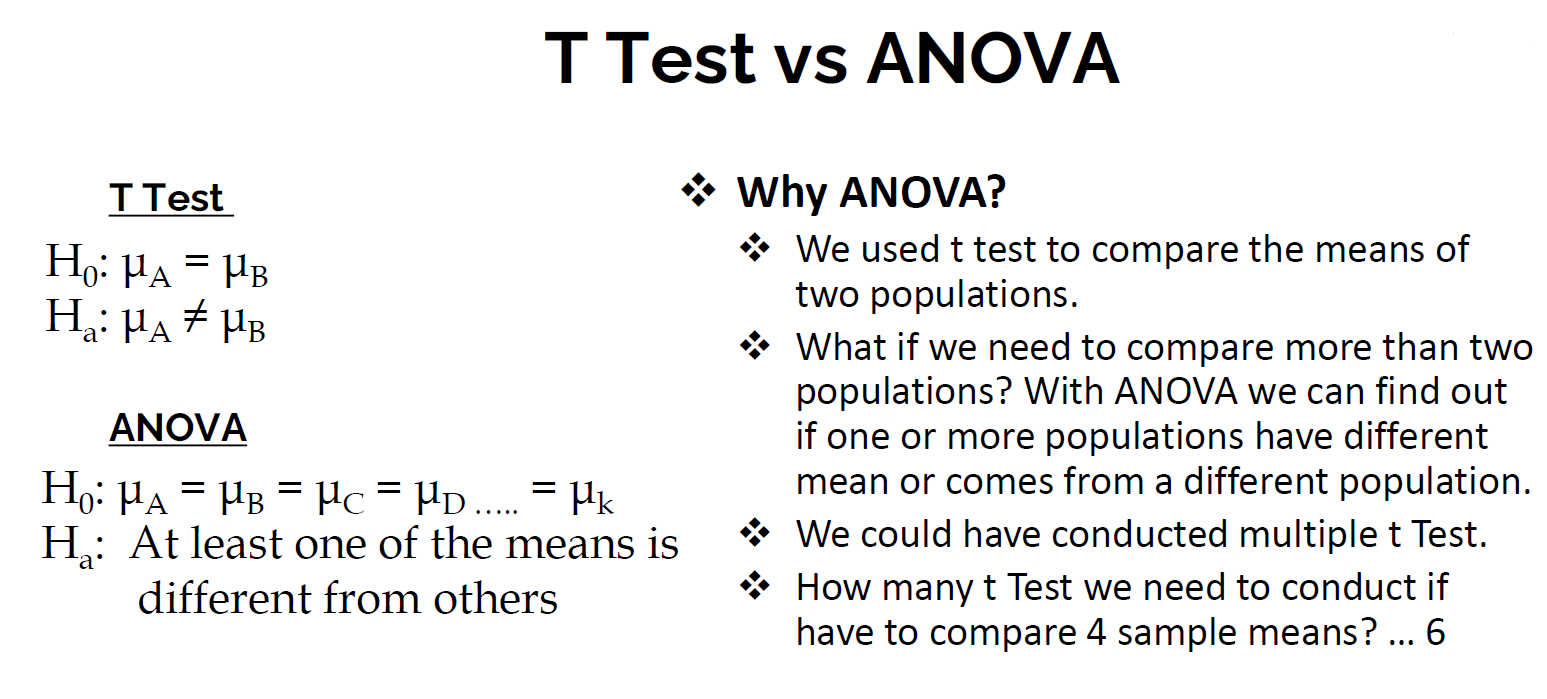

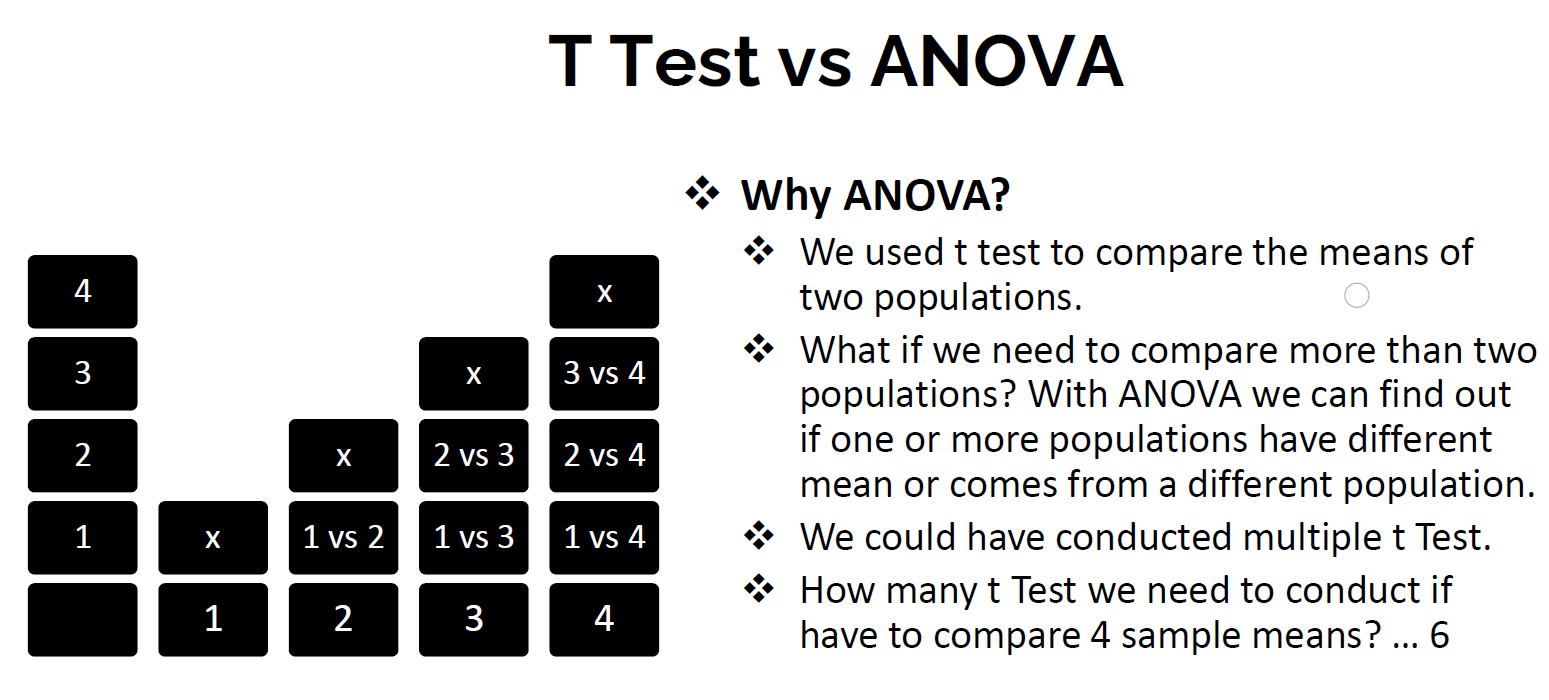

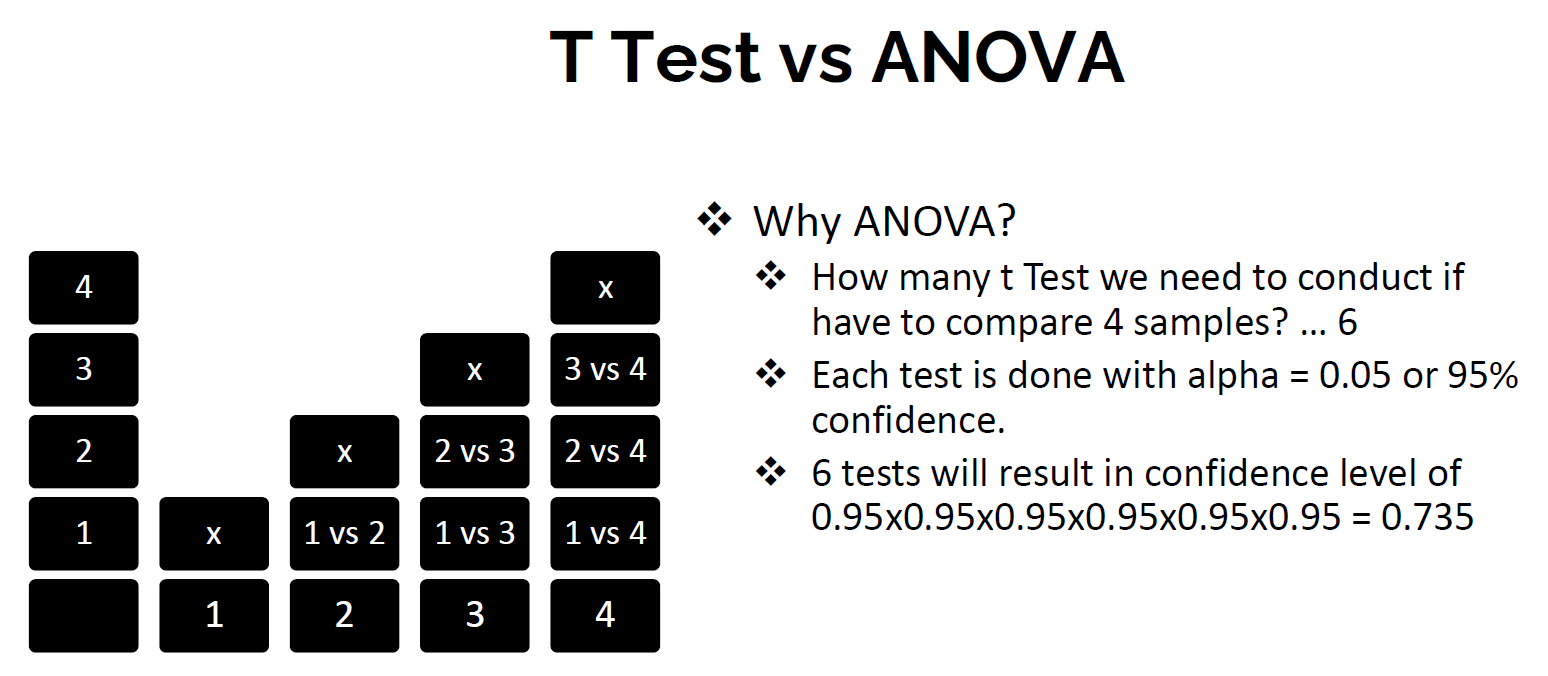

# ----------------------------------------------------------------------------------------------------------

### ANOVA - Concept

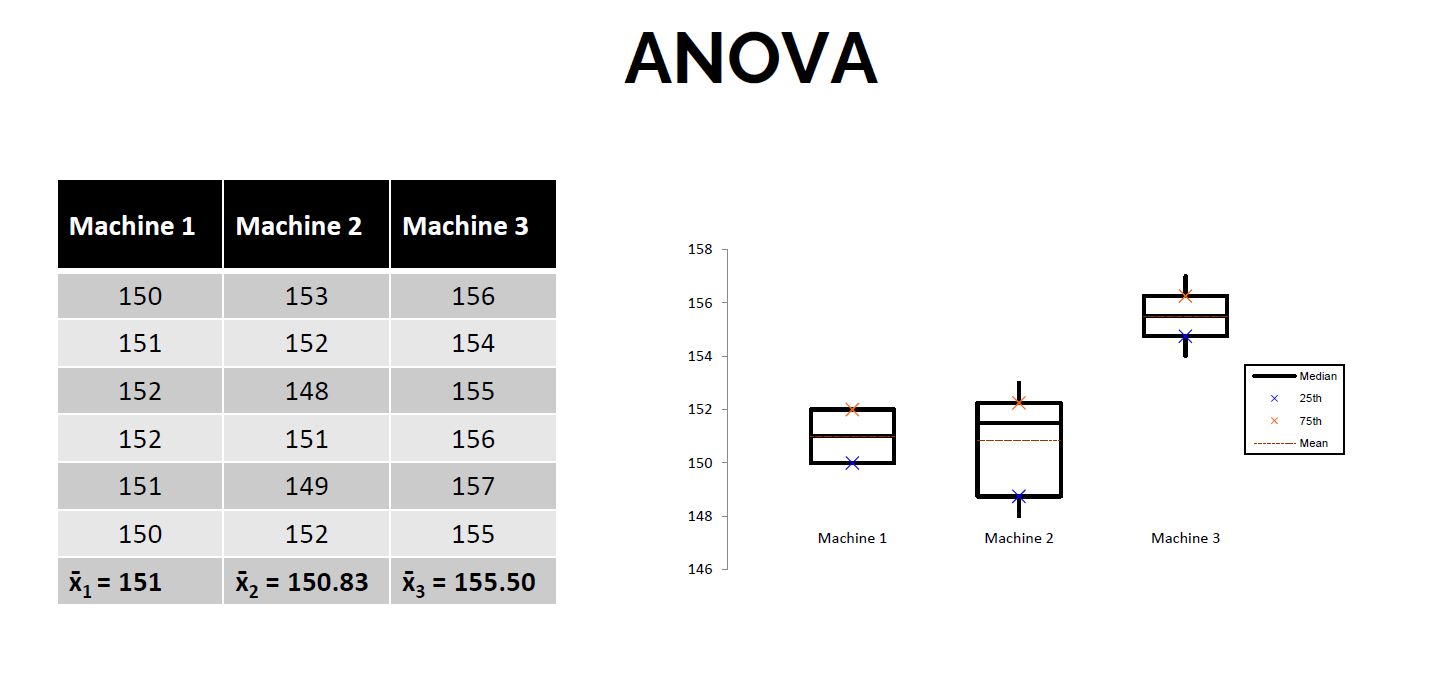

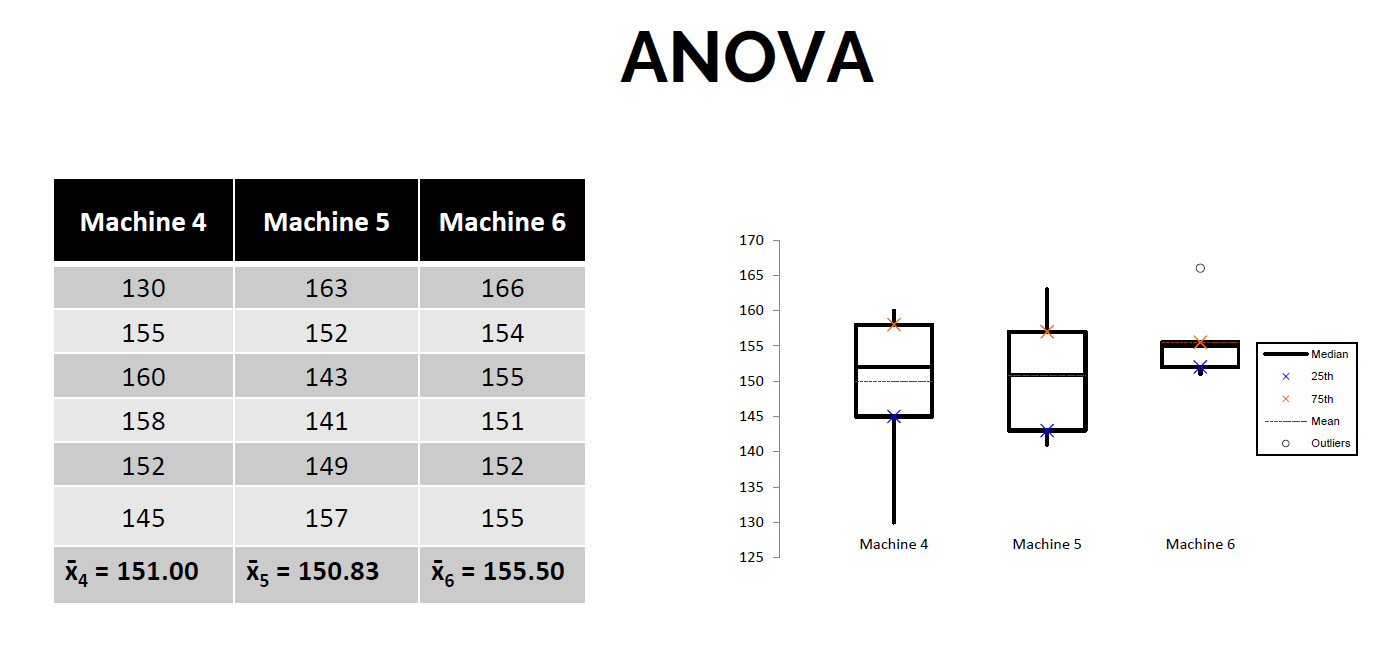

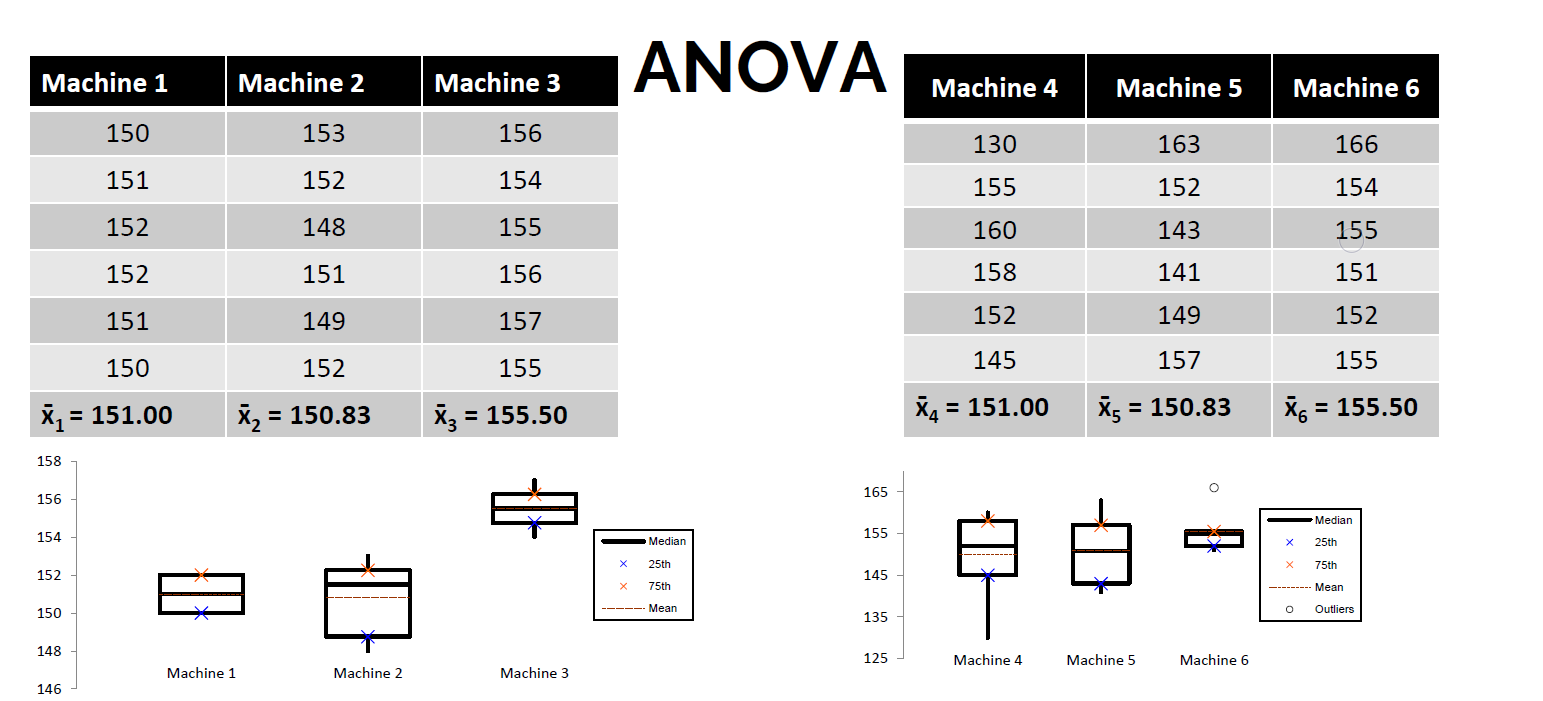

# --------------------------------------------------------------------------------------------------------------

### ANOVA - Deriving Formula:

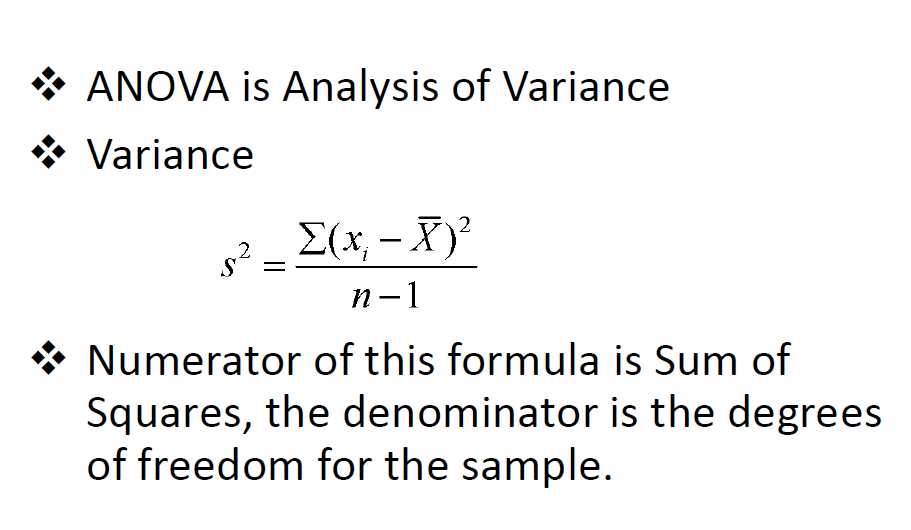

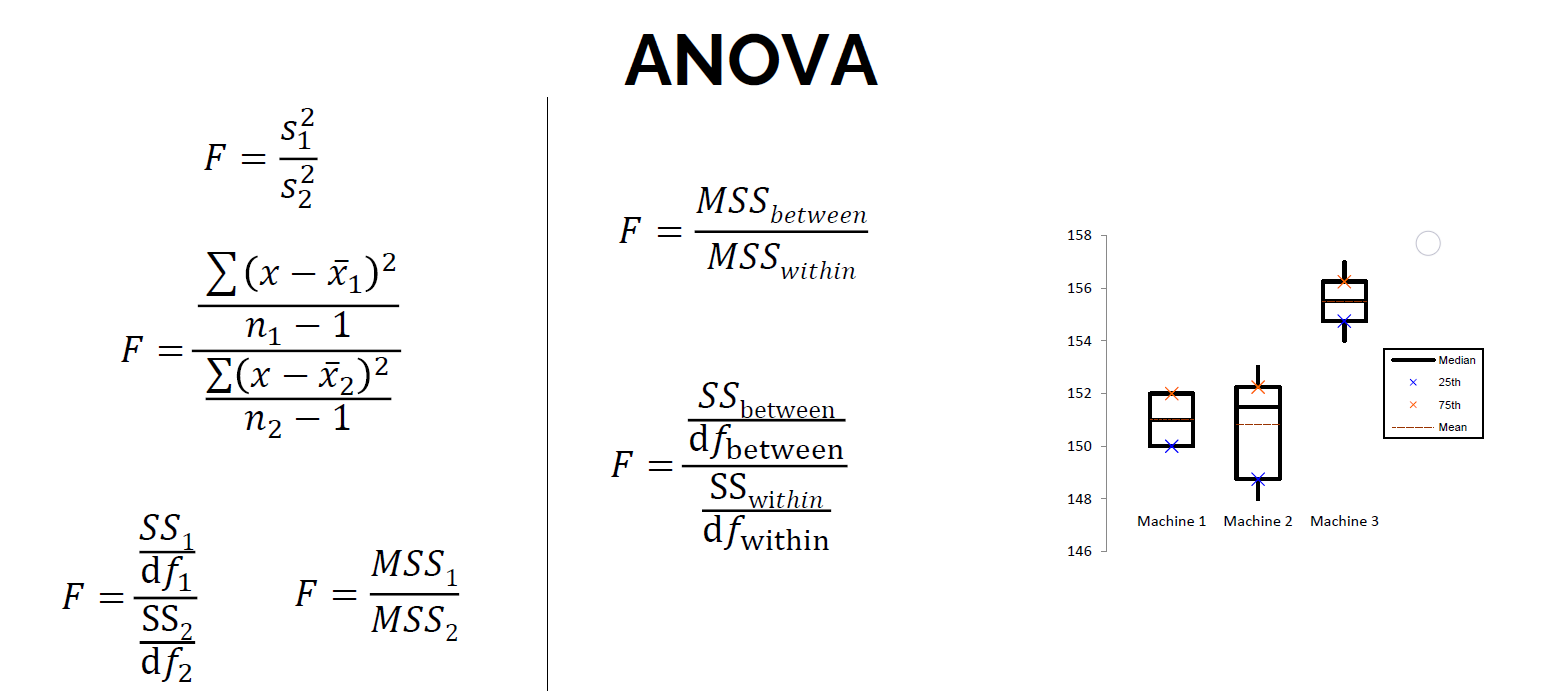

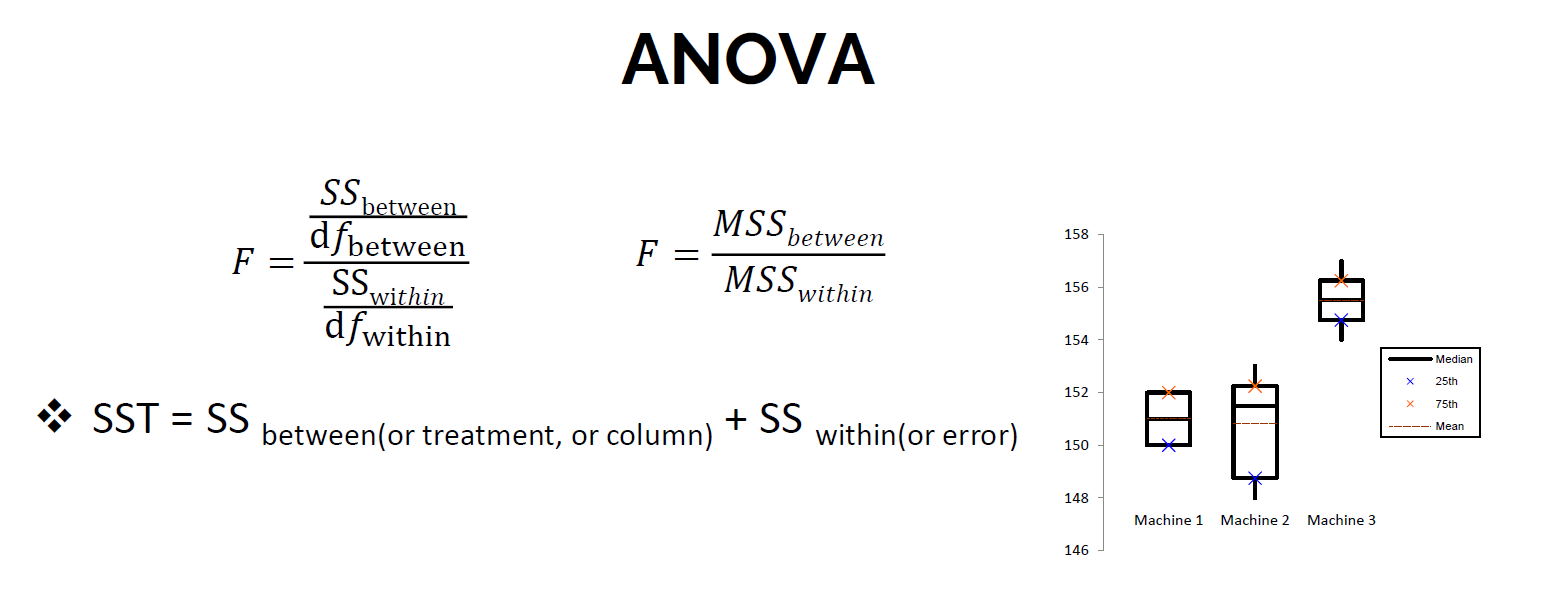

# -------------------------------------------------------------------------------------------------------------

### Example:

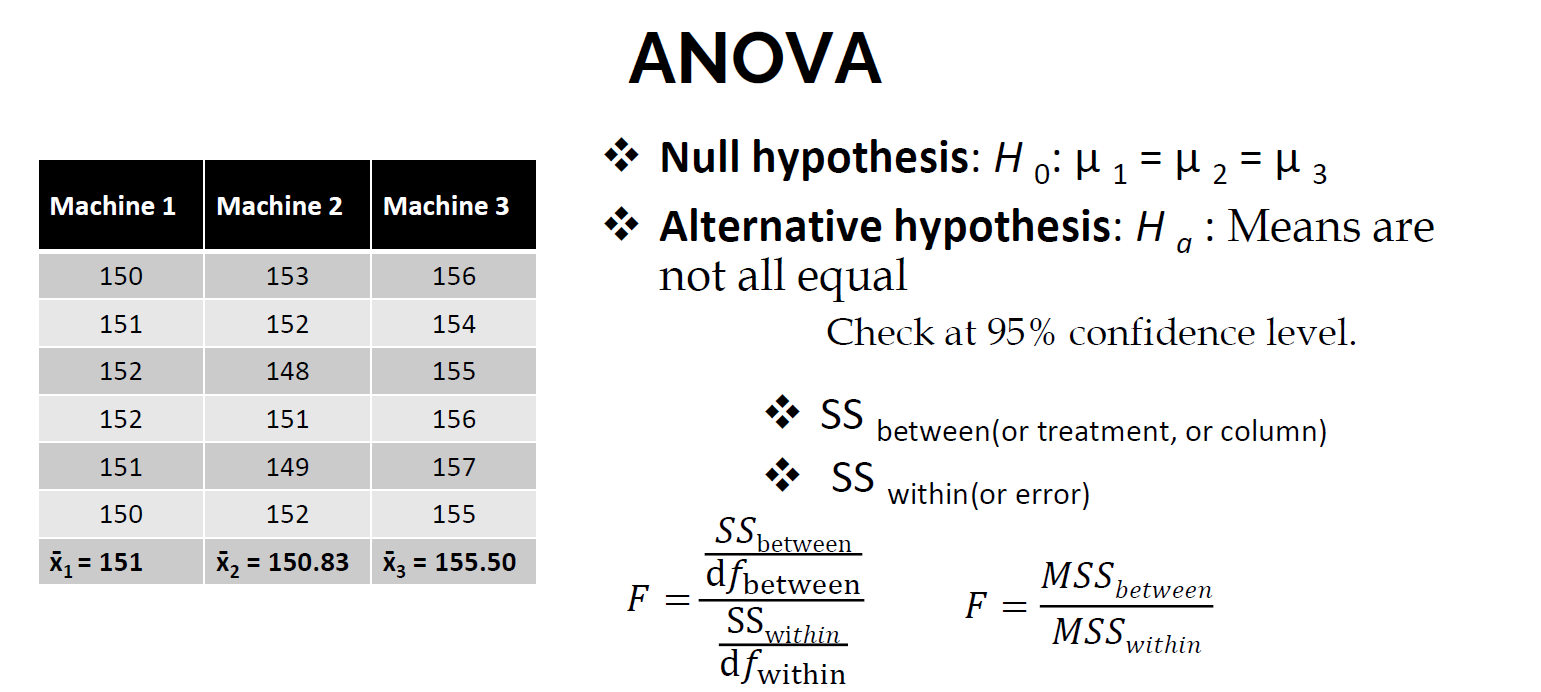

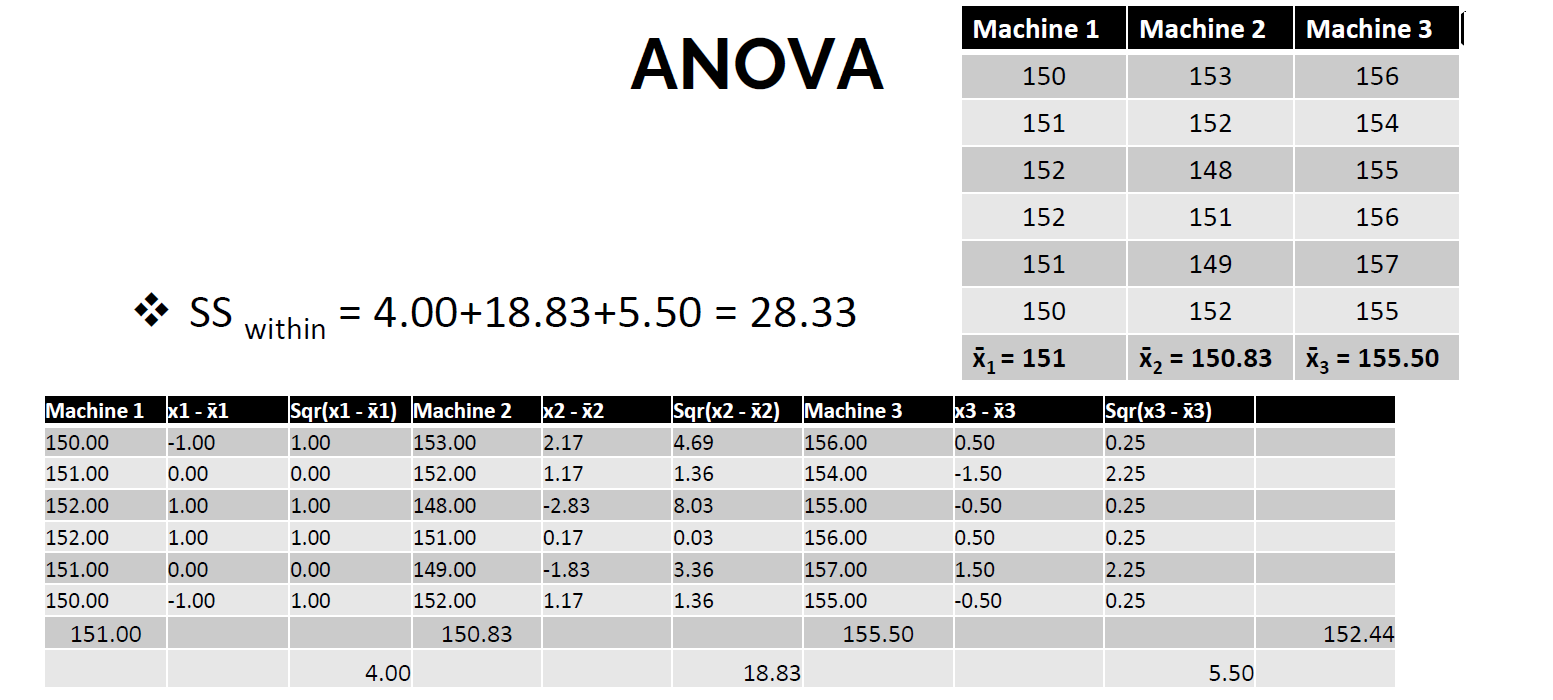

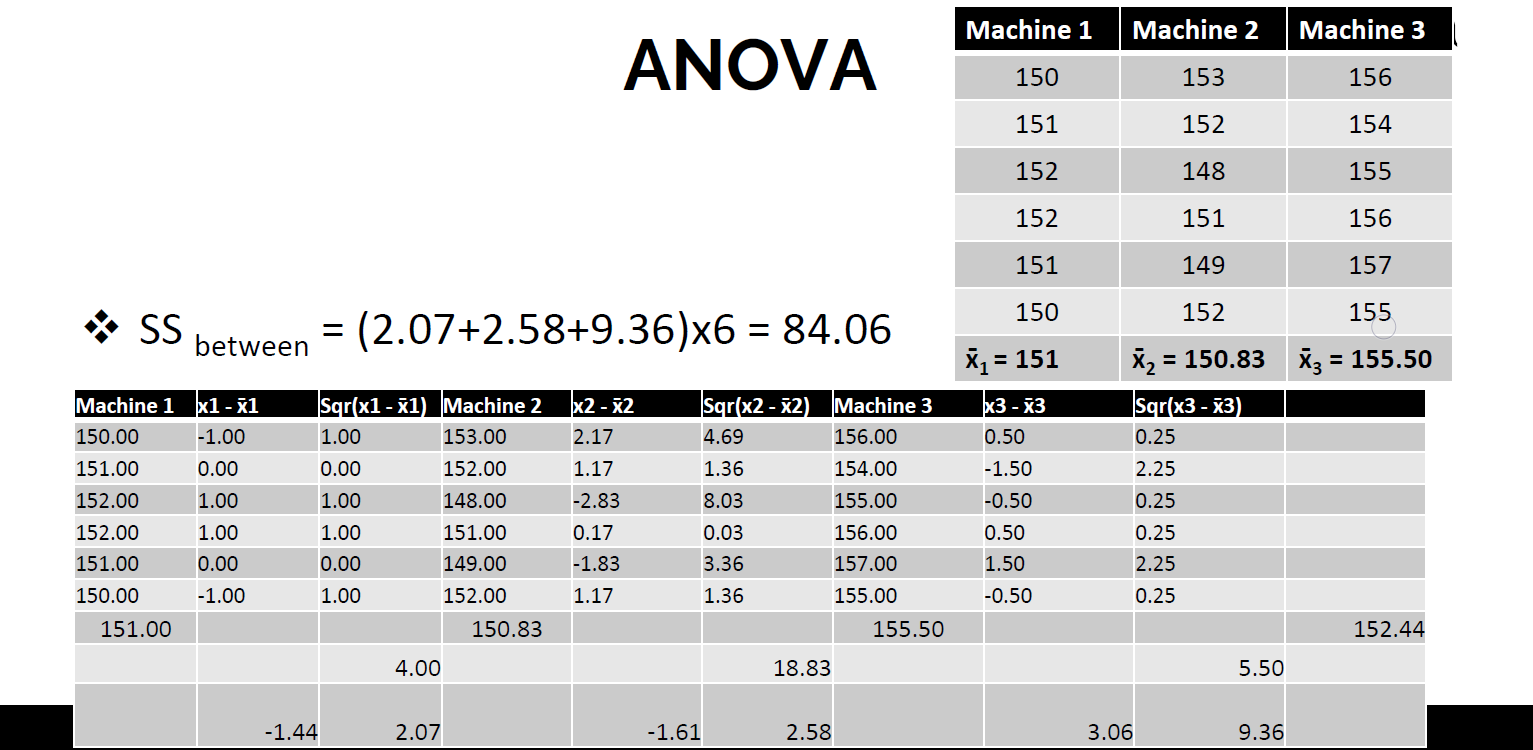

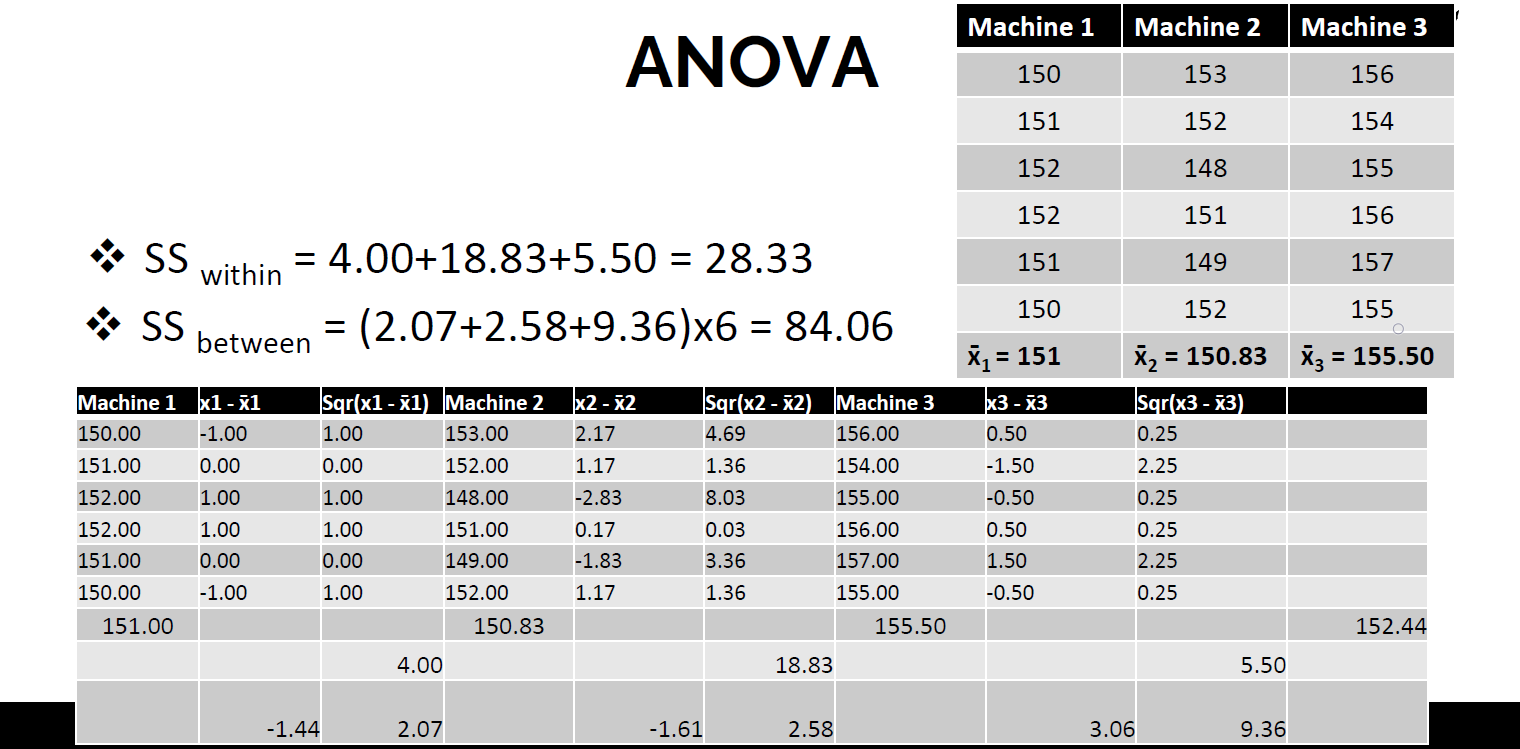

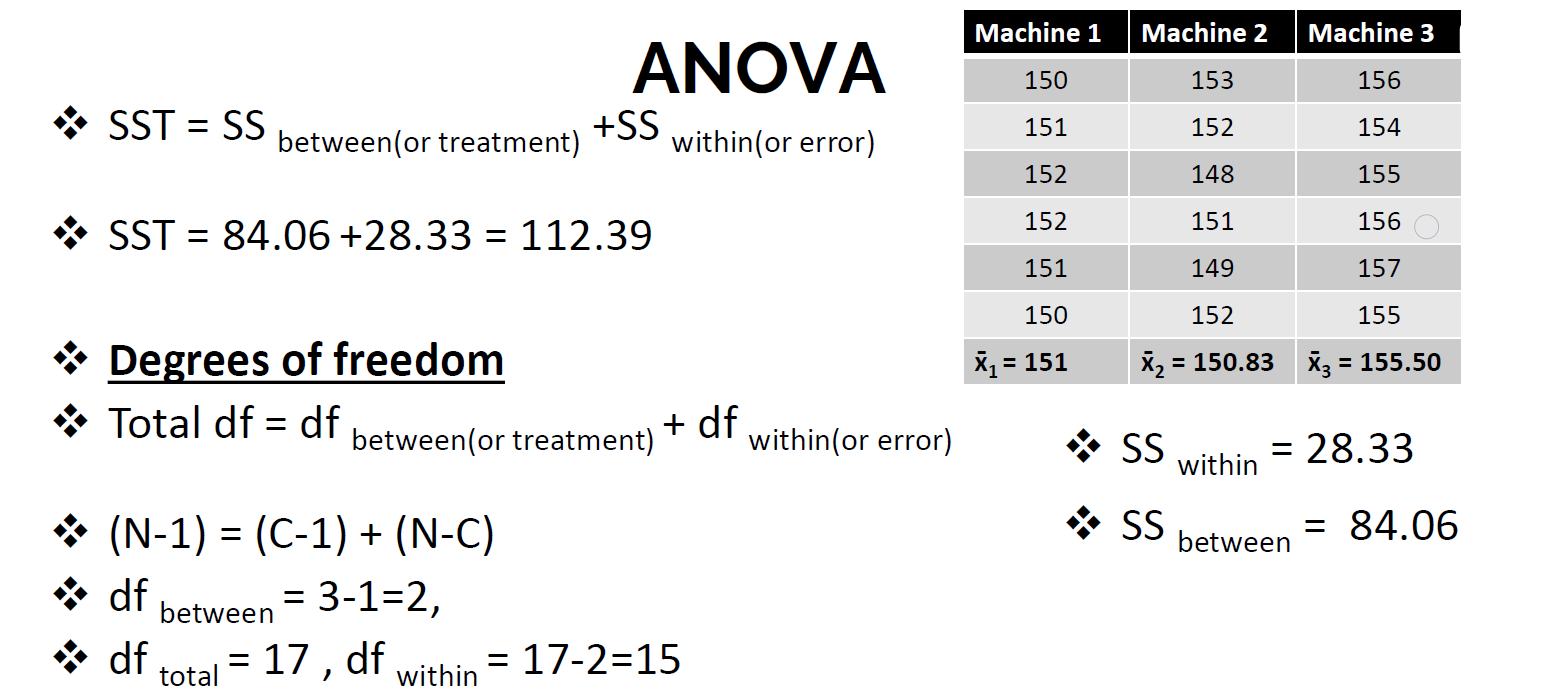

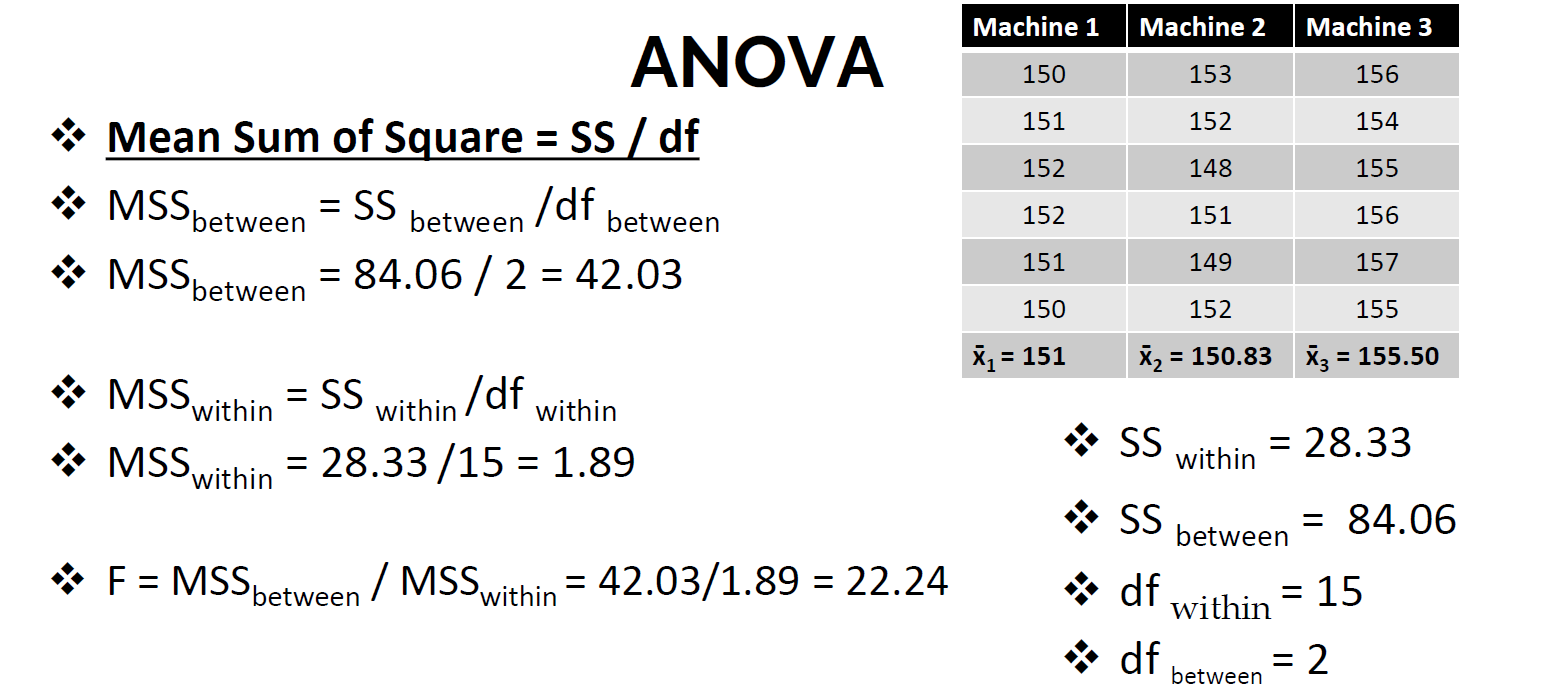

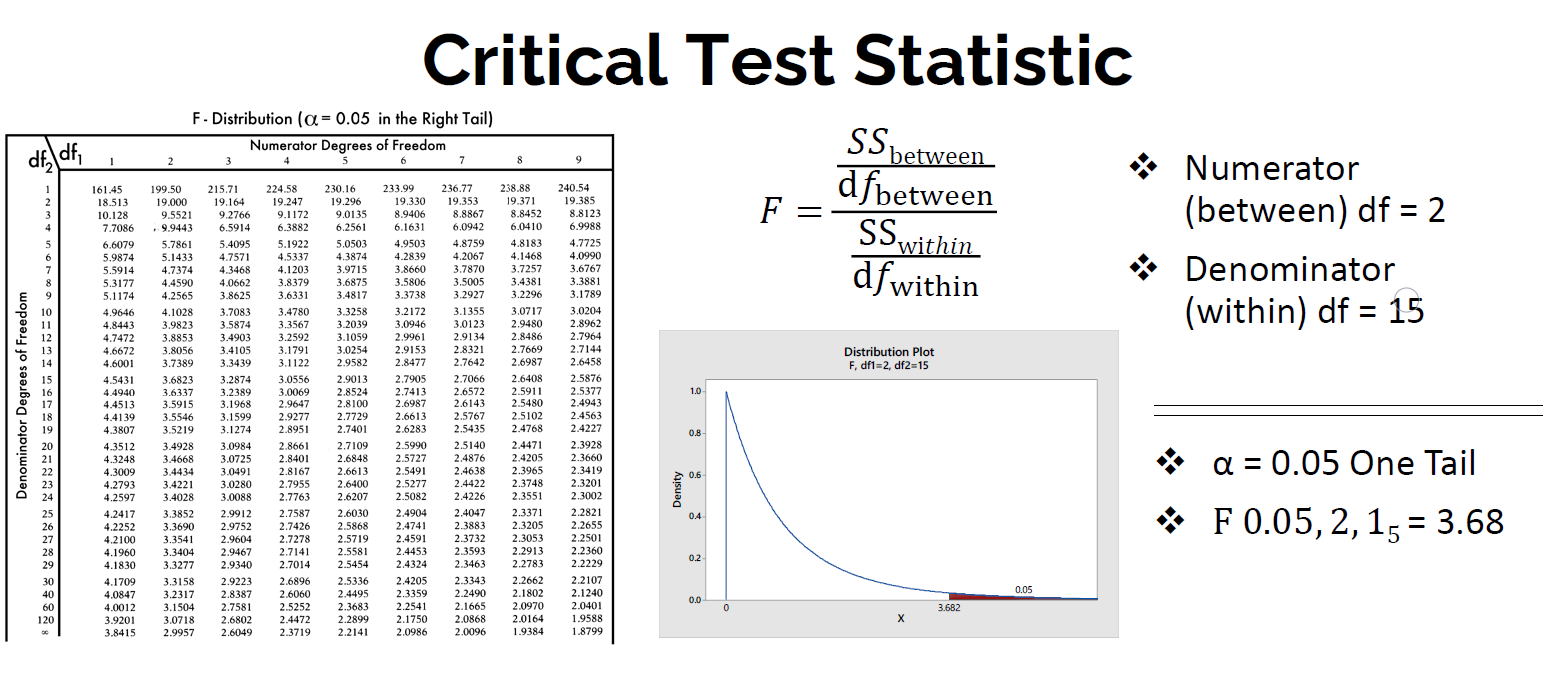

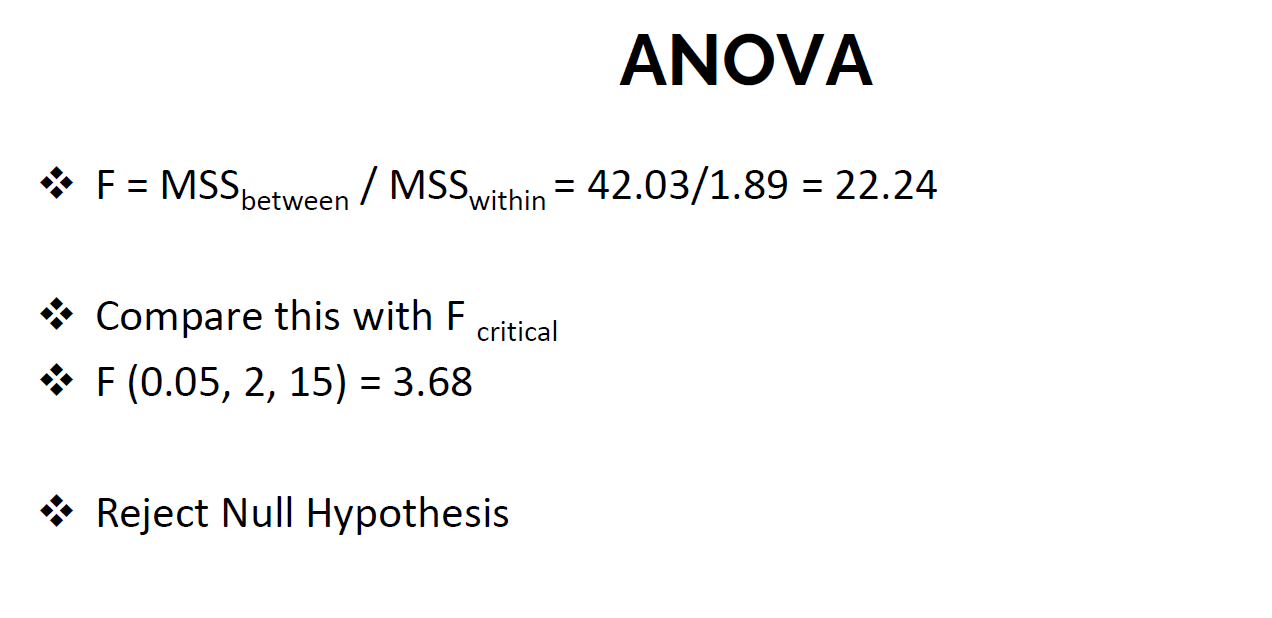

# ------------------------------------------------------------------------------------------------------------

### ANOVA Using Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Example 1:

In [2]:
machine_1 = [150, 151, 152, 152, 151, 150]
machine_2 = [153, 152, 148, 151, 149, 152]
machine_3 = [156, 154, 155, 156, 157, 155]

Null hypothesis : H0 : μ1 = μ2 = μ3.

Alternative hypothesis : Ha : Means are not all equal.

Check at 95% confidence level.

alpha = 0.05

#### Using Scipy Library:

In [10]:
import scipy.stats as stats

In [11]:
f_calculated, p_value = stats.f_oneway(machine_1, machine_2, machine_3)

In [12]:
print(f_calculated)
print(p_value)

22.264705882352935
3.2374085509077445e-05


In [13]:
# p-Value = 0.000032

# p-Value < alpha

# Hence, We can Reject The Null Hypothesis.

#### Using Statsmodels Library:

In [14]:
from statsmodels.stats.oneway import anova_oneway

In [15]:
anova_oneway(data= (machine_1, machine_2, machine_3), use_var= "equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

In [16]:
# p-Value = 0.000032

# p-Value < alpha

# Hence, We can Reject The Null Hypothesis.

#### Example 2:

From mpg Dataset in Seaborn Library, Check if Miles Per Gallon (mpg) is different for 4 Cylinder Cars for USA, Japan and Europe.

H0 : μEurope = μJapan = μUSA

H1 : Not all Means are Equal.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [20]:
mpg = sns.load_dataset("mpg")

In [21]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
mpg.shape

(398, 9)

In [24]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [25]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


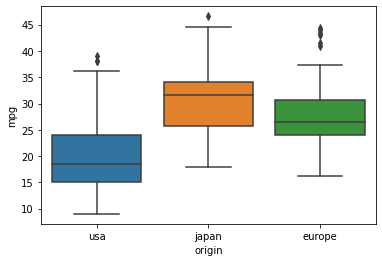

In [26]:
# Plotting Boxplot for mpg by Different Countries:

sns.boxplot(data= mpg, x= "origin", y= "mpg")
plt.show()

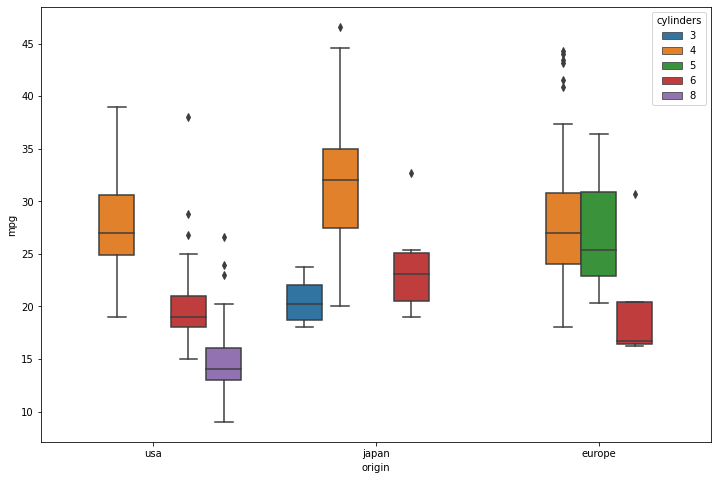

In [28]:
# Plotting Boxplot for mpg by Different Countries and Different Number of Cylinders:

plt.figure(figsize= (12,8))
sns.boxplot(data= mpg, x= "origin", y= "mpg", hue= "cylinders")
plt.show()

In [ ]:
# We want to compare mpg for Different Countries for 4 cylinder cars.
# Seperating Data for Different Countries in Seperate Datasets.

In [29]:
mpg["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [30]:
europe = mpg[(mpg["origin"] == "europe") & (mpg["cylinders"] == 4)]["mpg"]

In [31]:
europe.head()

19    26.0
20    25.0
21    24.0
22    25.0
23    26.0
Name: mpg, dtype: float64

In [32]:
japan = mpg[(mpg["origin"] == "japan") & (mpg["cylinders"] == 4)]["mpg"]

In [33]:
japan.head()

14    24.0
18    27.0
29    27.0
31    25.0
53    31.0
Name: mpg, dtype: float64

In [34]:
usa = mpg[(mpg["origin"] == "usa") & (mpg["cylinders"] == 4)]["mpg"]

In [35]:
usa.head()

30    28.0
32    25.0
46    22.0
49    23.0
56    26.0
Name: mpg, dtype: float64

In [36]:
# Performing One Way Anova Using Scipy:

import scipy.stats as stats

In [37]:
f_calculated, p_value = stats.f_oneway(europe, japan, usa)

In [38]:
print(f_calculated)
print(p_value)

9.411845545485601
0.00012379894210177303


In [ ]:
# p-Value = 0.0001

# p_value < alpha (0.005)

# Hence, We can Reject The Null Hypothesis.

In [39]:
# Performing One Way Anova Using Statsmodels Library:

from statsmodels.stats.oneway import anova_oneway

In [40]:
anova_oneway((europe, japan, usa), use_var= "equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 9.411845545485592
pvalue = 0.00012379894210177455
df = (2.0, 201.0)
df_num = 2.0
df_denom = 201.0
nobs_t = 204.0
n_groups = 3
means = array([28.41111111, 31.59565217, 27.84027778])
nobs = array([63., 69., 72.])
vars_ = array([41.50584229, 29.54777494, 20.6984957 ])
use_var = 'equal'
welch_correction = True
tuple = (9.411845545485592, 0.00012379894210177455)

In [41]:
# p-Value = 0.0001

# p_value < alpha (0.005)

# Hence, We can Reject The Null Hypothesis.